In [3]:
import smib_vsc_l
import vsg_ll

In [7]:
import pydae.ssa as ssa
import numpy as np
import matplotlib.pyplot as plt

In [8]:
xy_0 = {
    "V_1": 1.0,
    "theta_1": 0.0,
    "V_2": 1.0,
    "theta_2": 0.0,
    "omega_coi": 1.0,
    "p_s_1": 0.5,
    "e_qv_1": 1.0,
    "m_1": 0.8,
    "theta_t_1": 0.0,
    "omega_2": 1.0,
    "x_v_1": 1.0,
    "e_qm_1":1.0,
    "xi_v_1 ":1.0,
    "v_tq_ref_1":1.0
}

In [30]:
model1 = smib_vsc_l.model()  # vsc + ctrl
model2 = vsg_ll.model()      # fisix

params1 = {"S_n_1":10e6,'p_l_1':0.5,'v_ref_1':0.99,'X_s_1':0.1,'R_s_1':0.0,'b_1_2':-20,'X_v_1': 0.1, 'R_v_1':0.0,'K_q_1': 1}
params2 = {"S_n_1":10e6,'p_l_1':0.5,'v_ref_1':0.99,'X_s_1':0.0,'R_s_1':0.0,'b_1_2':-20,'X_v_1': 0.2, 'R_v_1':0.0,'K_q_1': 1}

model1.ini(params1,xy_0)
model2.ini(params2,'xy_0.json')

Input or parameter X_s_1 not found.
Input or parameter R_s_1 not found.


True

In [31]:
items = ['delta_1', 'e_qm_1','p_s_2', 'q_s_2','V_1','theta_1']

for item in items:
    val1 = model1.get_value(item)
    val2 = model2.get_value(item)

    print(f'{item:8s}: {val1:8.3f}  {val2:8.3f}  {val2/val1:5.2f}')

delta_1 :    0.181     0.181   1.00
e_qm_1  :    0.426     0.426   1.00
p_s_2   :   -0.050    -0.050   1.00
q_s_2   :    0.213     0.213   1.00
V_1     :    0.990     0.990   1.00
theta_1 :    0.004     0.004   1.00


In [32]:
items = [('p_s_1','p_1'),('q_s_1','q_1'),('i_sd_1','i_d_ref_1'),('i_sq_1','i_q_ref_1'),('e_vq_1','e_qv_1')]

for item1,item2 in items:
    val1 = model1.get_value(item1)
    val2 = model2.get_value(item2)

    print(f'{item1:6s}:  {val1:8.3f}  {val2:8.3f}')

p_s_1 :     0.500     0.500
q_s_1 :    -2.104    -2.104
i_sd_1:     2.003     2.003
i_sq_1:     0.871     0.871
e_vq_1:     0.574     0.574


In [33]:
## Test for vsc_l
model = model1
V_s = model.get_value('V_1')
theta_s = model.get_value('theta_1')

p_s = model.get_value('p_s_1') # pu-m
q_s = model.get_value('q_s_1') # pu-m

### powers relation with v and i:
v_s = V_s*np.exp(1j*theta_s)
s_s = p_s + 1j*q_s # pu-m

i_s = np.conj(s_s/v_s)

i_sr_expected = i_s.real
i_si_expected = i_s.imag

i_sr_model = model.get_value('i_sr_1') # pu-m
i_si_model = model.get_value('i_si_1') # pu-m

print(f'i_sr_expected = {i_sr_expected:6f}, i_sr_model = {i_sr_model:6f}')
print(f'i_si_expected = {i_si_expected:6f}, i_si_model = {i_si_model:6f}')

### coupling impedance
i_s_expected = i_sr_expected + 1j*i_si_expected # pu-m
R_s =  model.get_value('R_s_1') # pu-m
X_s =  model.get_value('X_s_1') # pu-m
Z_s = R_s + 1j*X_s # pu-m
v_dc = model.get_value('v_dc_1') # pu-m

v_t_expected = v_s + i_s*Z_s
m_expected = np.abs(v_t_expected)/v_dc
theta_t_expected = np.angle(v_t_expected)

m_model = model.get_value('m_1') # pu-m
theta_t_model = model.get_value('theta_t_1') # pu-m

print(f'm_expected = {m_expected:6f}, m_model = {m_model:6f}')
print(f'theta_t_expected = {theta_t_expected:6f}, theta_t_model = {theta_t_model:6f}')

i_sr_expected = 0.495577, i_sr_model = 0.495577
i_si_expected = 2.127187, i_si_model = 2.127187
m_expected = 0.649286, m_model = 0.649286
theta_t_expected = 0.069323, theta_t_model = 0.069323


In [34]:
## Test for vsg_ll control
model = model1
V_s = model.get_value('V_1')
theta_s = model.get_value('theta_1')

p_s = model.get_value('p_s_1') # pu-m
q_s = model.get_value('q_s_1') # pu-m

m = model.get_value('m_1') # pu-m
theta_t = model.get_value('theta_t_1') # pu-m



### powers relation with v and i:
v_s = V_s*np.exp(1j*theta_s)
s_s = p_s + 1j*q_s # pu-m

i_s = np.conj(s_s/v_s)




i_sr_model = model.get_value('i_sr_1') # pu-m
i_si_model = model.get_value('i_si_1') # pu-m

print(f'i_sr_expected = {i_sr_expected:6f}, i_sr_model = {i_sr_model:6f}')
print(f'i_si_expected = {i_si_expected:6f}, i_si_model = {i_si_model:6f}')

### coupling impedance
i_s_expected = i_sr_expected + 1j*i_si_expected # pu-m
R_s =  model.get_value('R_s_1') # pu-m
X_s =  model.get_value('X_s_1') # pu-m
Z_s = R_s + 1j*X_s # pu-m
v_dc = model.get_value('v_dc_1') # pu-m

v_t_expected = v_s + i_s*Z_s
m_expected = np.abs(v_t_expected)/v_dc
theta_t_expected = np.angle(v_t_expected)



print(f'm_expected = {m_expected:6f}, m_model = {m_model:6f}')
print(f'theta_t_expected = {theta_t_expected:6f}, theta_t_model = {theta_t_model:6f}')

i_sr_expected = 0.495577, i_sr_model = 0.495577
i_si_expected = 2.127187, i_si_model = 2.127187
m_expected = 0.649286, m_model = 0.649286
theta_t_expected = 0.069323, theta_t_model = 0.069323


In [35]:
model.get_value('V_1')

0.99

In [36]:
ssa.A_eval(model1)
damp = ssa.damp_report(model1)
damp.sort_values('Damp').round(2)

,Real,Imag,Freq.,Damp
Mode 4,-0.96,10.51,1.67,0.09
Mode 5,-0.96,-10.51,1.67,0.09
Mode 1,-1.00,0.00,0.00,1.00
Mode 2,-0.01,0.00,0.00,1.00
Mode 3,-179.03,0.00,0.00,1.00
Mode 6,-0.00,0.00,0.00,1.00
Mode 7,-0.00,0.00,0.00,1.00
Mode 8,-0.00,0.00,0.00,1.00


In [37]:
ssa.A_eval(model2)
damp = ssa.damp_report(model2)
damp.sort_values('Damp').round(2)

,Real,Imag,Freq.,Damp
Mode 3,-0.96,10.51,1.67,0.09
Mode 4,-0.96,-10.51,1.67,0.09
Mode 1,-0.01,0.00,0.00,1.00
Mode 2,-179.03,0.00,0.00,1.00
Mode 5,-0.00,0.00,0.00,1.00
Mode 6,-0.00,0.00,0.00,1.00
Mode 7,-0.00,0.00,0.00,1.00


In [46]:
model = smib_vsc_l.model()
model.Dt = 0.01
model.decimation = 1
model.ini(params1,xy_0)

p_l_1 = 0.0
q_l_1 = 0.0
v_ref_1 = 1.0

model.ini({'p_l_1':p_l_1,'q_l_1':q_l_1,'v_ref_1':v_ref_1},xy_0)

Dt_mid = 0.1
times = np.arange(0,10,Dt_mid)

for it,t in enumerate(times):
    
    if t>1.0:
        p_l_1 = 0.0
        q_l_1 = 0.5
        v_ref_1 = 1.0
        
    model.run( t,{'p_l_1':p_l_1,'q_l_1':q_l_1,'v_ref_1':v_ref_1})

model.post();




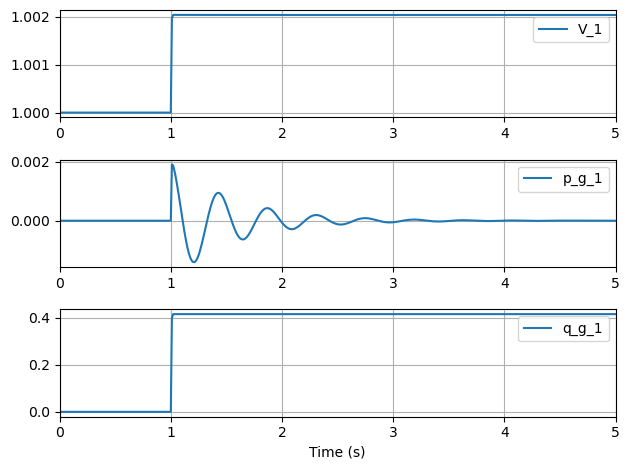

In [47]:
fig,axes = plt.subplots(nrows=3)

axes[0].plot(model.Time,  model.get_values('V_1'),label='V_1')

axes[1].plot(model.Time,  model.get_values('p_s_1'),label='p_g_1')
axes[2].plot(model.Time,  model.get_values('q_s_1'),label='q_g_1')

#axes[2].plot(model.Time,  model.get_values('omega_1'),label='omega_1')

for ax in axes:
    ax.legend()
    ax.grid()
    ax.set_xlim([0,5])
ax.set_xlabel('Time (s)')
fig.tight_layout()